Performing eda on penguines dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
df = pd.read_csv('penguins_size.csv')

In [3]:
df.sample(8)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
125,Adelie,Torgersen,40.6,19.0,199.0,4000.0,MALE
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,MALE
249,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,MALE
143,Adelie,Dream,40.7,17.0,190.0,3725.0,MALE
305,Gentoo,Biscoe,50.8,17.3,228.0,5600.0,MALE
212,Chinstrap,Dream,51.9,19.5,206.0,3950.0,MALE
81,Adelie,Torgersen,42.9,17.6,196.0,4700.0,MALE
301,Gentoo,Biscoe,52.5,15.6,221.0,5450.0,MALE


In [4]:
df.shape

(344, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
mis_val = df.isnull().sum()
mis_val_per = 100*mis_val/len(df)
mis_val_table = pd.concat([mis_val,mis_val_per],axis=1)
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns

,Missing Values,% of Total Values
species,0,0.000000
island,0,0.000000
culmen_length_mm,2,0.581395
culmen_depth_mm,2,0.581395
flipper_length_mm,2,0.581395
body_mass_g,2,0.581395
sex,10,2.906977


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

<Axes: >

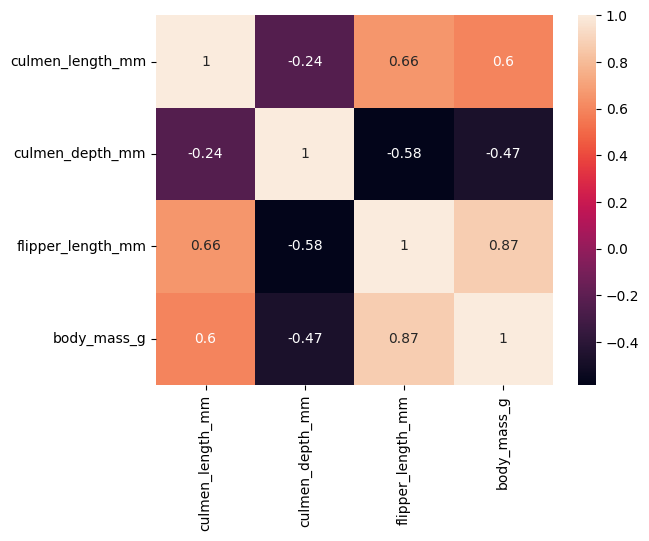

In [11]:
sns.heatmap(df[numeric_cols].corr(), annot=True)

In [12]:
categorical_cols = df.select_dtypes(object).columns.tolist()
categorical_cols

['species', 'island', 'sex']

In [13]:
df[categorical_cols]

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE
...,...,...,...
339,Gentoo,Biscoe,NaN
340,Gentoo,Biscoe,FEMALE
341,Gentoo,Biscoe,MALE
342,Gentoo,Biscoe,FEMALE


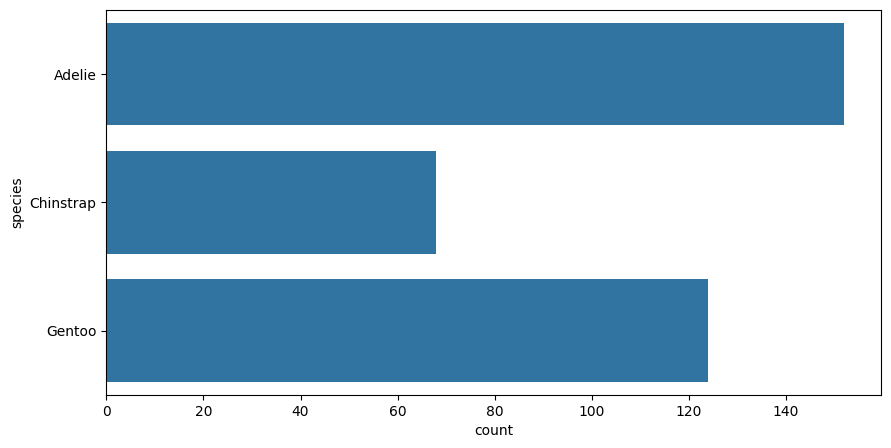

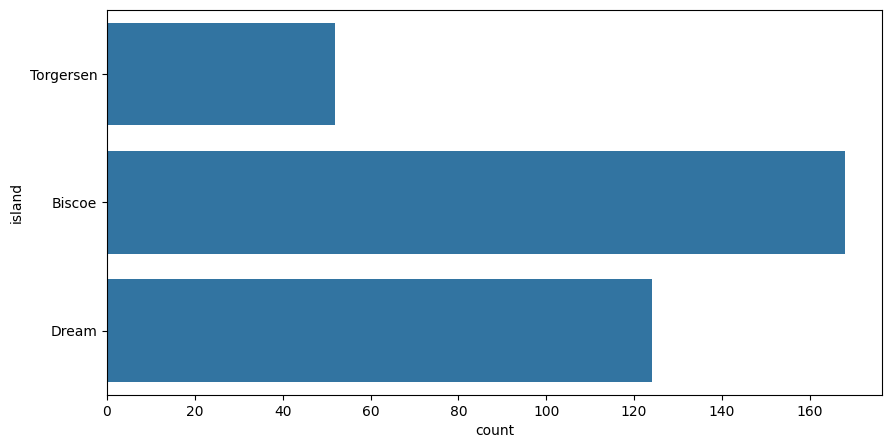

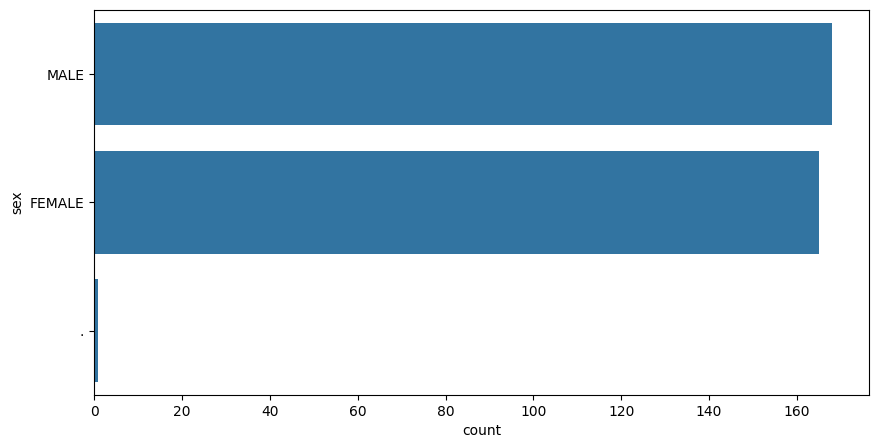

In [14]:
for cols in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(df[cols])

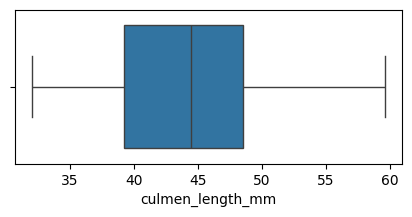

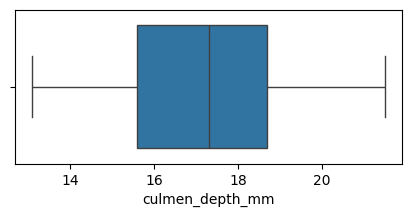

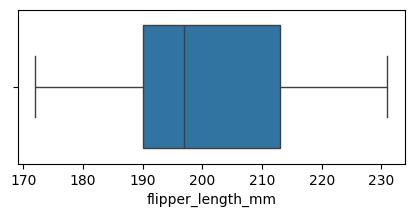

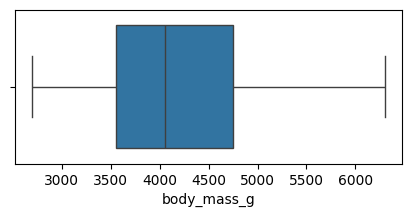

In [15]:
for cols in numeric_cols:
    plt.figure(figsize=(5,2))
    sns.boxplot(df[cols], orient='h')

<Axes: xlabel='species', ylabel='flipper_length_mm'>

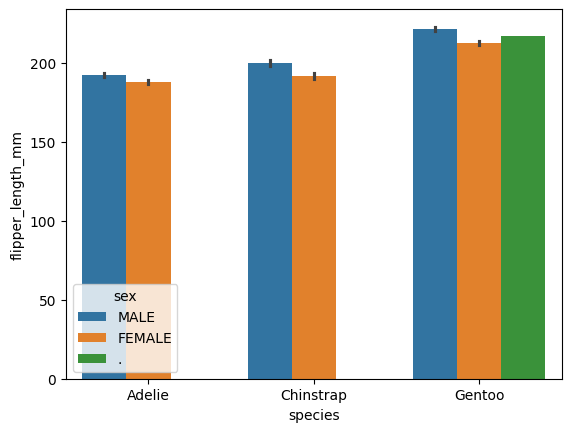

In [16]:
sns.barplot( df,x='species',y='flipper_length_mm',hue='sex')

In [17]:
numeric_cols

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

<Axes: xlabel='species', ylabel='culmen_depth_mm'>

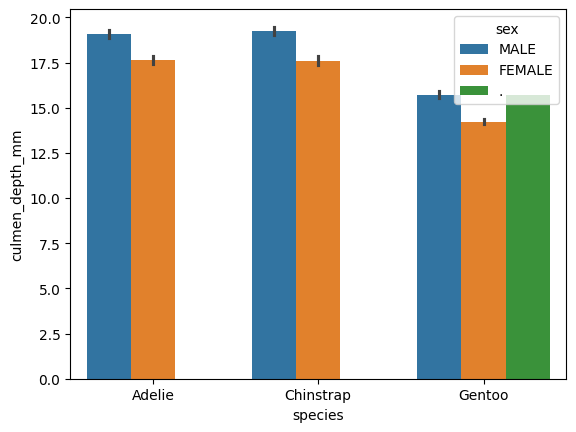

In [18]:
sns.barplot( df,x='species',y='culmen_depth_mm',hue='sex')

<Axes: xlabel='species', ylabel='culmen_length_mm'>

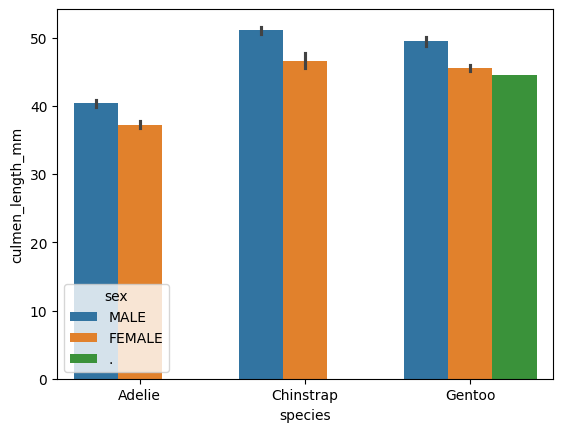

In [19]:
sns.barplot( df,x='species',y='culmen_length_mm',hue='sex')

<Axes: xlabel='species', ylabel='body_mass_g'>

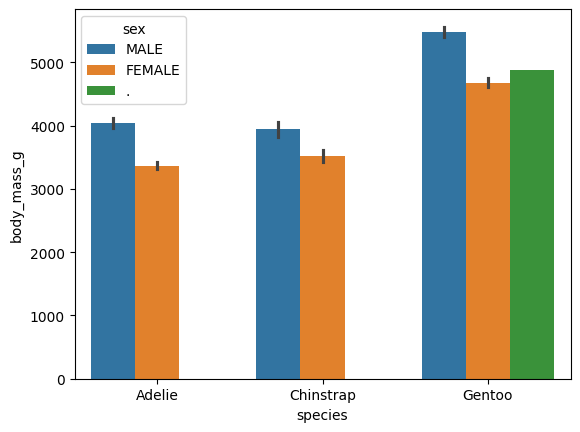

In [20]:
sns.barplot(df, x='species',y='body_mass_g', hue='sex')

C:\Users\Abid\AppData\Local\Temp\ipykernel_11904\586240241.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x='body_mass_g', hue='sex', fill=True)


<Axes: xlabel='body_mass_g', ylabel='Count'>

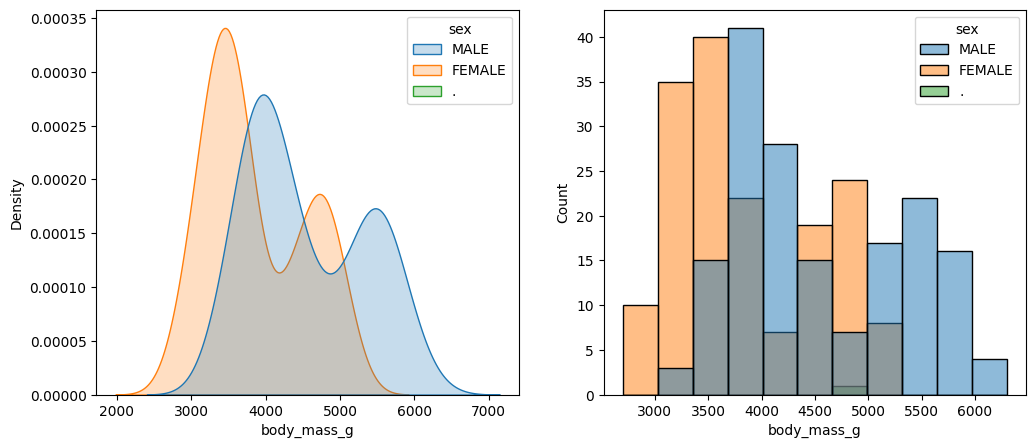

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(df, x='body_mass_g', hue='sex', fill=True)
plt.subplot(1,2,2)
sns.histplot(df,x='body_mass_g',hue='sex')

Text(0.5, 1.0, 'species vs body mass')

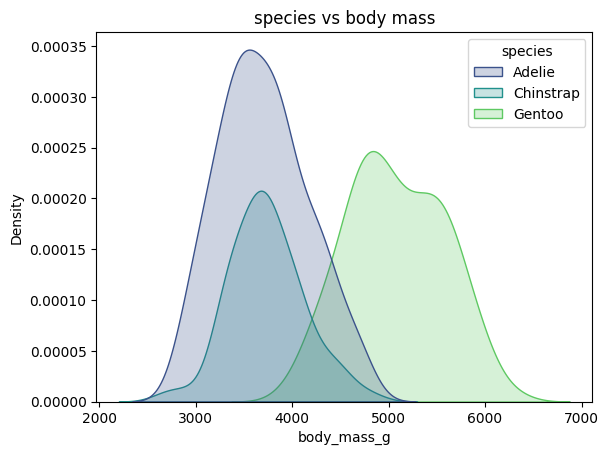

In [22]:
sns.kdeplot(data=df, x='body_mass_g', hue='species', palette='viridis', fill=True)
plt.title('species vs body mass')

Text(0.5, 1.0, 'A heatmap of species vs island')

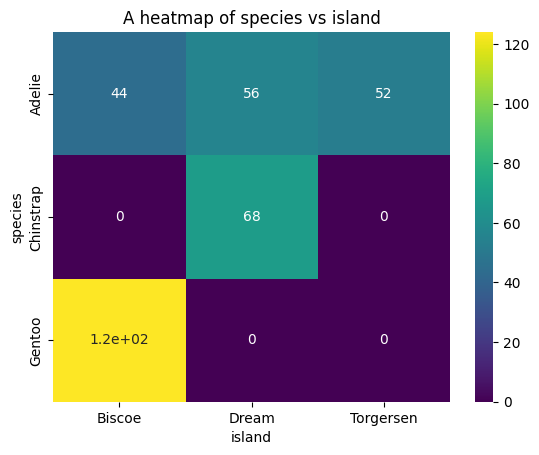

In [23]:
sns.heatmap(pd.crosstab(df['species'],df['island']),annot=True, cmap='viridis')
plt.title('A heatmap of species vs island')


In [24]:
df.groupby("species")["island"].value_counts(normalize=True)*100.


species    island   
Adelie     Dream         36.842105
           Torgersen     34.210526
           Biscoe        28.947368
Chinstrap  Dream        100.000000
Gentoo     Biscoe       100.000000
Name: proportion, dtype: float64

In [25]:
df.groupby(['species','island'])['body_mass_g'].agg(['mean','std','count']).reset_index()

,species,island,mean,std,count
0,Adelie,Biscoe,3709.659091,487.733722,44
1,Adelie,Dream,3688.392857,455.146437,56
2,Adelie,Torgersen,3706.372549,445.107940,51
3,Chinstrap,Dream,3733.088235,384.335081,68
4,Gentoo,Biscoe,5076.016260,504.116237,123


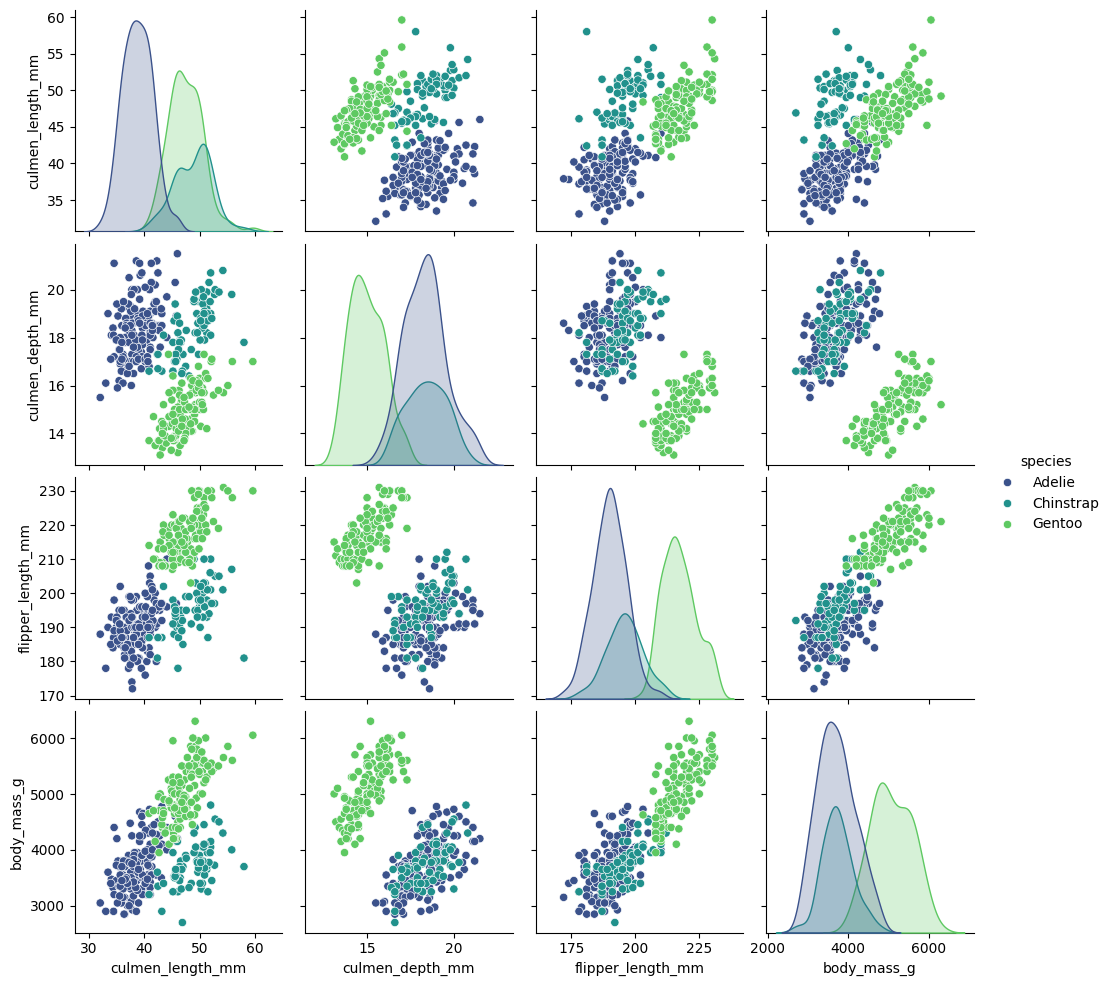

In [26]:
sns.pairplot(df, hue='species', palette='viridis')